**Learning Objectives**
https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/
1.   Describe the characteristics of 3 key vector data structures: points, lines and polygons.
2.   Open a shapefile in Python using geopandas.
3. View the CRS and other spatial metadata of a vector spatial layer in Python
4. Be able to describe what a Coordinate Reference System (CRS) is.
5. List 2-3 fundamental differences between a geographic and a projected CRS.
6. Identify the CRS of a spatial dataset and reproject it to another CRS in Python.
7. Clip a spatial vector point and line layer to the spatial extent of a polygon layer in Python using geopandas.
8. Dissolve polygons based upon an attribute in Python using geopandas.
9. Join spatial attributes from one shapefile to another in Python using geopandas.



# Chapter two - Fundamtental of vector data in Python

```
# This is formatted as code
```



**Learning objectives**

1. Describe the characteristics of 3 key vector data structures: points, lines and polygons.
2. Open a shapefile in Python using geopandas - gpd.read_file().
3. View the CRS and other spatial metadata of a vector spatial layer in Python
4. Access and view the attributes of a vector spatial layer in Python.


**Shape file sturcture**
1. .shp: the file that contains the geometry for all features.
2. .shx: the file that indexes the geometry.
3. .dbf: the file that stores feature attributes in a tabular format.
4. .prj: the file that contains information on projection format including the coordinate system and projection information. It is a plain text file describing the projection using well-known text (WKT) format.
5. .sbn and .sbx: the files that are a spatial index of the features.
6. .shp.xml: the file that is the geospatial metadata in XML format, (e.g. ISO 19115 or XML format).


### Import shapefile

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 454 kB/s 
     |████████████████████████████████| 16.7 MB 286 kB/s 
     |████████████████████████████████| 6.3 MB 43.5 MB/s 


In [ ]:
pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 27.1 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

# Get data and set working directory
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

Extracted output to /root/earth-analytics/data/spatial-vector-lidar/.


The shapefiles that you will import are:

* A polygon shapefile representing our field site boundary
* A line shapefile representing roads, and
* A point shapefile representing the location of field sites at the San Joachin field site.

In [ ]:
# Define path to file
plot_centroid_path = os.path.join("data", "spatial-vector-lidar", 
                                  "california", "neon-sjer-site", 
                                  "vector_data", "SJER_plot_centroids.shp")


In [ ]:
# Import shapefile using geopandas
sjer_plot_locations = gpd.read_file(plot_centroid_path)

### Spatial Data Attributes

In [ ]:
# View top 6 rows of attribute table
sjer_plot_locations.head(6)

,Plot_ID,Point,northing,easting,plot_type,geometry
0,SJER1068,center,4111567.818,255852.376,trees,POINT (255852.376 4111567.818)
1,SJER112,center,4111298.971,257406.967,trees,POINT (257406.967 4111298.971)
2,SJER116,center,4110819.876,256838.760,grass,POINT (256838.760 4110819.876)
3,SJER117,center,4108752.026,256176.947,trees,POINT (256176.947 4108752.026)
4,SJER120,center,4110476.079,255968.372,grass,POINT (255968.372 4110476.079)
5,SJER128,center,4111388.570,257078.867,trees,POINT (257078.867 4111388.570)


In [ ]:
# View the geometry type of each row
sjer_plot_locations.geom_type

0     Point
1     Point
2     Point
3     Point
4     Point
5     Point
6     Point
7     Point
8     Point
9     Point
10    Point
11    Point
12    Point
13    Point
14    Point
15    Point
16    Point
17    Point
dtype: object

### Spatial metadata

Key metadata for all shapefiles include:

1. Object Type: the class of the imported object.
2. Coordinate Reference System (CRS): the projection of the data.
3. Extent: the spatial extent (geographic area that the shapefile covers) of the shapefile. Note that the spatial extent for a shapefile represents the extent for ALL spatial objects in the shapefile.

In [ ]:
# View object type
type(sjer_plot_locations)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# View CRS of object
sjer_plot_locations.crs

<Projected CRS: EPSG:32611>
Name: WGS 84 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 120°W and 114°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Alberta; British Columbia (BC); Northwest Territories (NWT); Nunavut. Mexico. United States (USA).
- bounds: (-120.0, 0.0, -114.0, 84.0)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
## View the spatial extent
sjer_plot_locations.total_bounds

array([ 254738.618, 4107527.074,  258497.102, 4112167.778])

The spatial extent of a shapefile or geopandas GeoDataFrame represents the geographic "edge" or location that is the **furthest north, south east and west**.

### How many features are in shape file ?

In [ ]:
sjer_plot_locations.shape

(18, 6)

## Plot a Shapefile

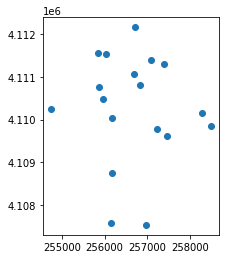

In [ ]:
sjer_plot_locations.plot()

However in general it is good practice to setup an axis object so you can plot different layers together. When you do that you need to provide the plot function with the axis object that you want it to plot on. Below, you define the axis as ax, here:

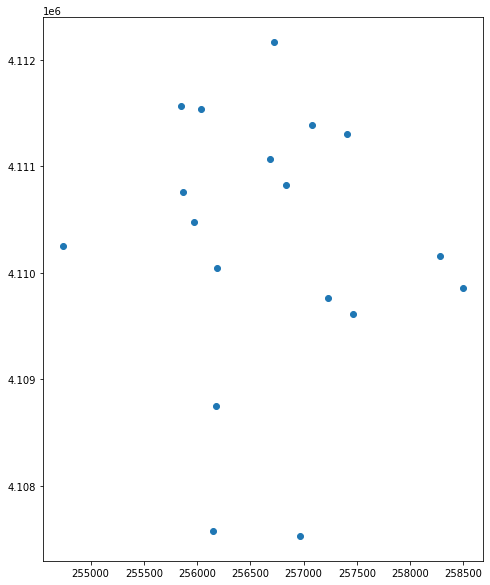

In [ ]:
fig, ax = plt.subplots(figsize= (10,10))
# plot the data and provide ax= argument wiht the ax object
sjer_plot_locations.plot(ax=ax)
plt.show()
# Note that you can name that axis whatever you’d like. mean ax1 in place of ax

### Plot the data by feature attribute and add the legends too

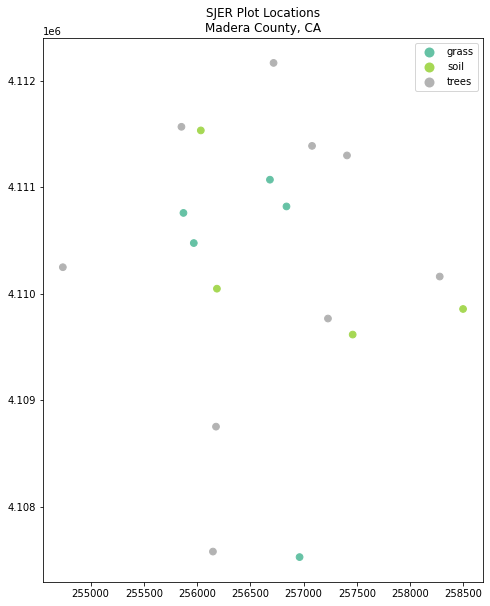

In [ ]:
fig, ax = plt.subplots(figsize= (10,10))

# Plot the data and add a legend
sjer_plot_locations.plot(column='plot_type',
                         categorical =True,
                         legend = True,
                         figsize = (10,6),
                         markersize = 45,
                         cmap ='Set2',
                         ax =ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()


### Change plot colors and symbols

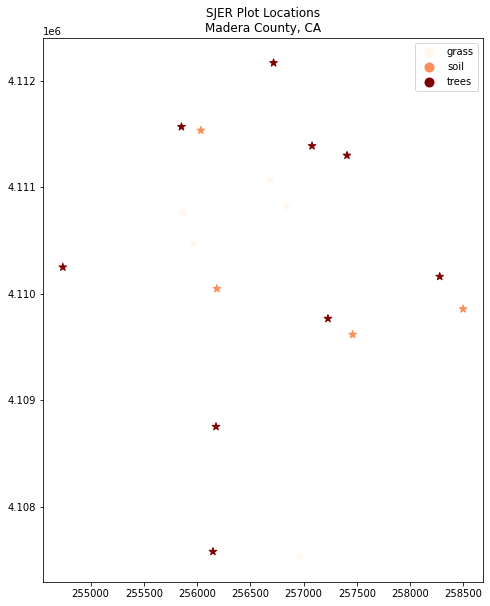

In [ ]:
# use the marker= argument to specify the marker style.
fig, ax = plt.subplots(figsize=(10, 10))

sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         legend=True,
                         marker='*',
                         markersize=65,
                         cmap='OrRd', 
                         ax=ax)

ax.set_title('SJER Plot Locations\nMadera County, CA')

plt.show()

### Plot muliple shapefile together with goepandas


In [ ]:
# Define path to crop boundary
sjer_crop_extent_path = os.path.join("data", "spatial-vector-lidar", 
                                     "california", "neon-sjer-site", 
                                     "vector_data", "SJER_crop.shp")

# Import crop boundary
sjer_crop_extent = gpd.read_file(sjer_crop_extent_path)

1. ax.set_axis_off() is used to turn off the x and y axis and

2. plt.axis('equal') is used to ensure the x and y axis are uniformly spaced.

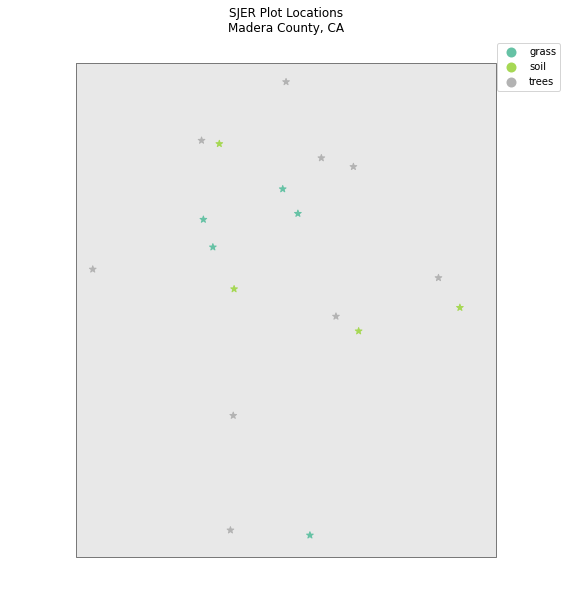

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

# First setup the plot using the crop_extent layer as the base layer
sjer_crop_extent.plot(color='lightgrey',
                      edgecolor='black',
                      alpha=.5,
                      ax=ax)
# Add another layer using the same ax
sjer_plot_locations.plot(column='plot_type',
                         categorical=True,
                         marker='*',
                         legend=True,
                         markersize=50,
                         cmap='Set2', ax=ax)
# Clean up axes
ax.set_title('SJER Plot Locations\nMadera County, CA')
ax.set_axis_off()

plt.axis('equal')
plt.show()

#  Coordinate reference system

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/

The Components of a CRS
The coordinate reference system is made up of several key components:

1. Coordinate System: the X, Y grid upon which your data is overlayed and how you define where a point is located in space.
2. Horizontal and vertical units: The units used to define the grid along the x, y (and z) axis.
3. Datum: A modeled version of the shape of the earth which defines the origin used to place the coordinate system in space.
4. Projection Information: the mathematical equation used to flatten objects that are on a round surface (e.g. the earth) so you can view them on a flat surface (e.g. your computer screens or a paper map).

 CRS covers projection , datum, and units . acutually , it is a system. UTM crs in which projection UTM 11N zone, WGS 84 datum WGS 84 elliptosid, units m

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

In [ ]:
# Adjust plot font sizes
sns.set(font_scale =1.5)
sns.set_style('white')

In [ ]:
# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [ ]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

## Plot the Data

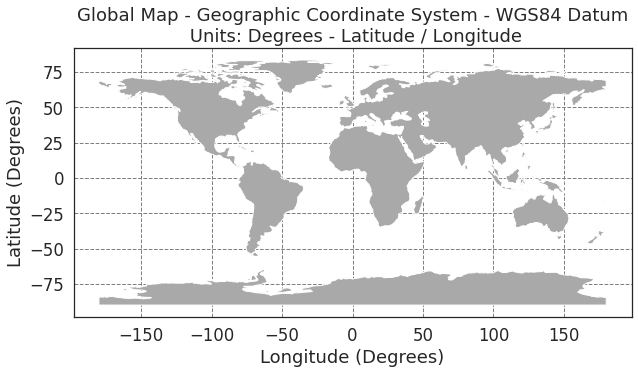

In [ ]:
# Plot worldBound data using geopandas
fig, ax = plt.subplots(figsize=(10, 5))
worldBound.plot(color='darkgrey', 
                ax=ax)
# Set the x and y axis labels
ax.set(xlabel="Longitude (Degrees)",
       ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
# Add the x y graticules
ax.set_axisbelow(True)
ax.yaxis.grid(color ='gray',linestyle ='dashed')
ax.xaxis.grid(color='gray',linestyle='dashed')

## Create spatial points object

To plot these points spatially you will

1. create a numpy array of the point locations and
2. Use a for loop to populate a shapely Point object

In [ ]:
# add three coordinate locations to your map. Note that the UNITS are in decimal degrees (latitude, longitude)
# Create numpy array of x,y point locations
add_points = np.array([[-105.2519,   40.0274], 
                       [  10.75  ,   59.95  ], 
                       [   2.9833,   39.6167]])
# Turn points into list of x,y shapely points 
city_locations = [Point(xy) for xy in add_points]
city_locations

In [ ]:
# Create geodataframe using the points
city_locations = gpd.GeoDataFrame(city_locations, 
                                  columns=['geometry'],
                                  crs=worldBound.crs)
city_locations.head(3)

,geometry
0,POINT (-105.25190 40.02740)
1,POINT (10.75000 59.95000)
2,POINT (2.98330 39.61670)


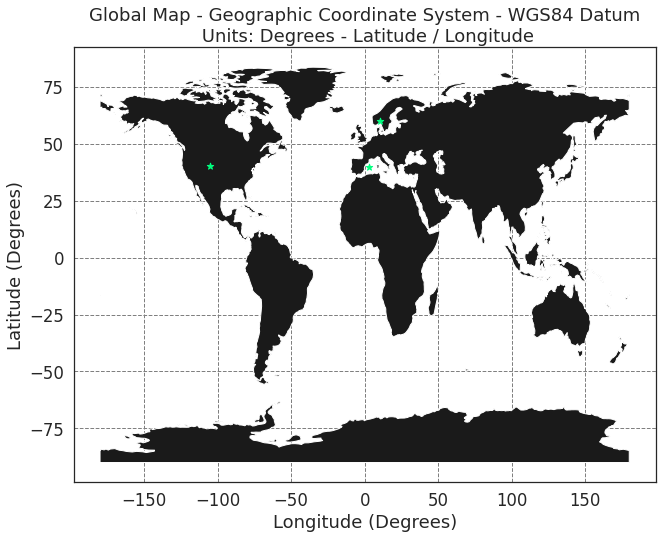

In [ ]:
# Finally you can plot the points on top of your world map

# Plot point locations
fig, ax = plt.subplots(figsize=(12, 8))

worldBound.plot(figsize=(10, 5), color='k',
               ax=ax)
# Add city locations
city_locations.plot(ax=ax, 
                    color='springgreen', 
                    marker='*',
                    markersize=45)

# Setup x y axes with labels and add graticules
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",
       title="Global Map - Geographic Coordinate System - WGS84 Datum\n Units: Degrees - Latitude / Longitude")
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

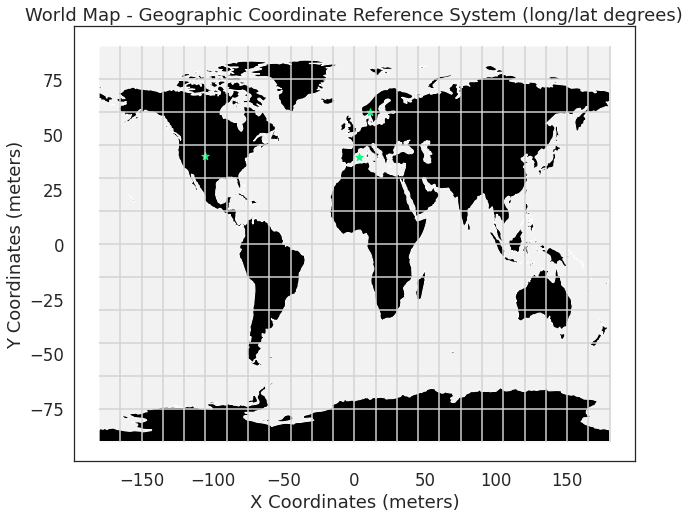

In [ ]:
# Next, import proper graticules that can be projected into a particular coordinate reference system.
# Import graticule & world bounding box shapefile data
graticule_path = os.path.join("data", "spatial-vector-lidar", "global", 
                              "ne_110m_graticules_all", "ne_110m_graticules_15.shp")
graticule = gpd.read_file(graticule_path)

bbox_path = os.path.join("data", "spatial-vector-lidar", "global", 
                         "ne_110m_graticules_all", "ne_110m_wgs84_bounding_box.shp")
bbox = gpd.read_file(bbox_path)

# Create map axis object
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# Add bounding box and graticule layers
bbox.plot(ax=ax, alpha=.1, color='grey')
graticule.plot(ax=ax, color='lightgrey')
worldBound.plot(ax=ax, color='black')

# Add points to plot 
city_locations.plot(ax=ax, 
                    markersize=60, 
                    color='springgreen',
                    marker='*')
# Add title and axes labels
ax.set(title="World Map - Geographic Coordinate Reference System (long/lat degrees)",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)");


## Geographic CRS 

latitude and longitude locations are not located using uniform measurement units. Thus, geographic CRSs are not ideal for measuring distance. This is why other projected CRS have been developed

## Projected CRS - Robinson

1. Robinson is a projected CRS

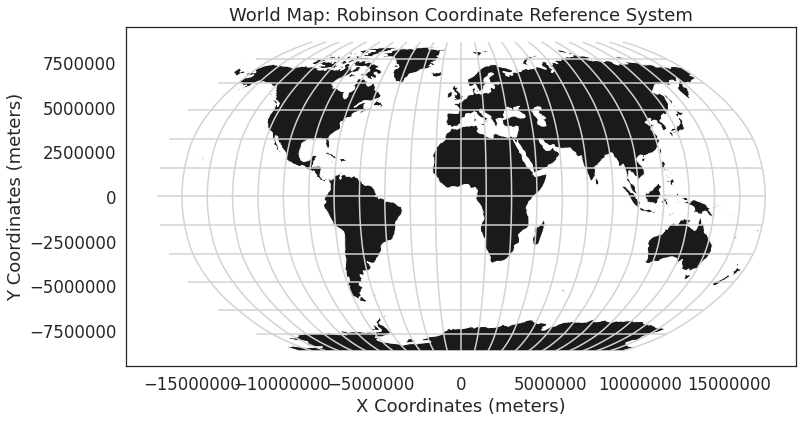

In [ ]:
# Reproject the data
worldBound_robin = worldBound.to_crs('+proj=robin')
graticule_robin = graticule.to_crs('+proj=robin')

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')

graticule_robin.plot(ax=ax, color='lightgrey')

ax.set(title="World Map: Robinson Coordinate Reference System",
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

What happens if you add the same Lat / Long coordinate locations that you used above, to your map? Remember that the data on your map are in the CRS - Robinson.

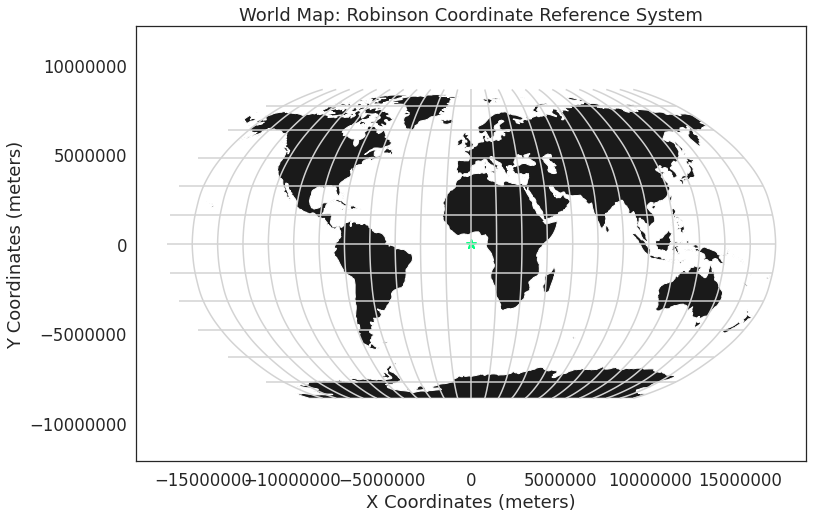

In [ ]:
# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

worldBound_robin.plot(ax=ax,
                      color='k')
graticule_robin.plot(ax=ax, 
                     color='lightgrey')
city_locations.plot(ax=ax, 
                    marker='*', 
                    color='springgreen', 
                    markersize=100)

ax.set(title="World Map: Robinson Coordinate Reference System", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)
    
plt.axis('equal');  

Notice above that when you try to add lat/long coordinates in degrees, to a map in a different CRS, the points are not in the correct location. You need to first convert the points to the same CRS that your other data are in. The process of converting a dataset from one CRS to another is often referred to as reprojection.

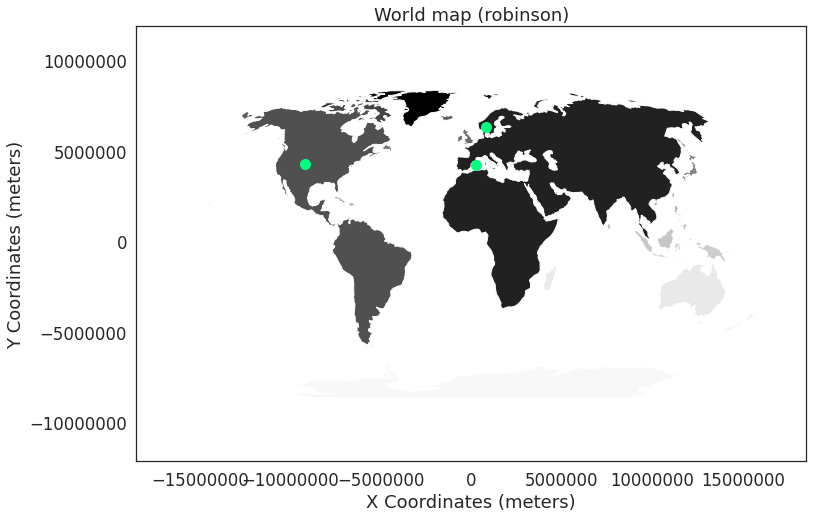

In [ ]:
# use the .to_crs method to reproject your data.

# Reproject point locations to the Robinson projection
city_locations_robin = city_locations.to_crs(worldBound_robin.crs)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
worldBound_robin.plot(ax=ax, 
                      cmap='Greys')
ax.set(title="World map (robinson)", 
       xlabel="X Coordinates (meters)",
       ylabel="Y Coordinates (meters)")
city_locations_robin.plot(ax=ax, markersize=100, color='springgreen')

for axis in [ax.xaxis, ax.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

plt.axis('equal');

## Compare maps

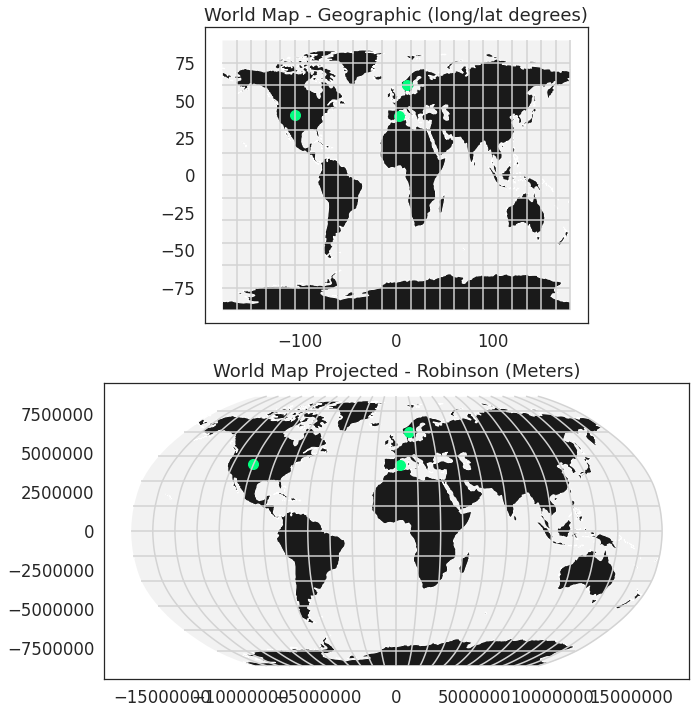

In [ ]:
# Reproject graticules and bounding box  to robinson
graticule_robinson = graticule.to_crs('+proj=robin')
bbox_robinson = bbox.to_crs('+proj=robin')

# Setup plot with 2 "rows" one for each map and one column
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(13, 12))

# First plot
bbox.plot(ax=ax0,
          alpha=.1,
          color='grey')

graticule.plot(ax=ax0,
               color='lightgrey')

worldBound.plot(ax=ax0,
                color='k')

city_locations.plot(ax=ax0,
                    markersize=100,
                    color='springgreen')

ax0.set(title="World Map - Geographic (long/lat degrees)")


# Second plot
bbox_robinson.plot(ax=ax1,
                   alpha=.1,
                   color='grey')

graticule_robinson.plot(ax=ax1,
                        color='lightgrey')

worldBound_robin.plot(ax=ax1,
                      color='k')

city_locations_robin.plot(ax=ax1,
                          markersize=100,
                          color='springgreen')

ax1.set(title="World Map Projected - Robinson (Meters)")

for axis in [ax1.xaxis, ax1.yaxis]:
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    axis.set_major_formatter(formatter)

Notice the x and y axis units on these two maps are completely different. This is one reason why points in a geographic WGS84 CRS don't line up properly when plotted on a map in another CRS like Robinson. However if you reproject the data, then they will line up properly.

# Geographic vs projected coordinate reference systems

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/geographic-vs-projected-coordinate-reference-systems-python/

## The structure of a Geographic CRS

Geographic coordinate reference systems are best for global analysis however it is important to remember that distance is distorted using a geographic lat / long CRS

In [ ]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et
import seaborn as sns

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

The distance between the 2 degrees of longitude at the equator (0°) is ~ 69 miles. The distance between 2 degrees of longitude at 40°N (or S) is only 53 miles. This difference in actual distance relative to “distance” between the actual parallels and meridians demonstrates how distance calculations will be less accurate when using geographic CRSs

## Understand UTM Coordinates

In [ ]:
boulder_df = np.array([[476911.31,  4429455.35]]) #UTM Zone 13N easting: 476,911.31m, northing: 4,429,455.35m
geometry = [Point(xy) for xy in boulder_df]

boulder_loc = gpd.GeoDataFrame(geometry,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


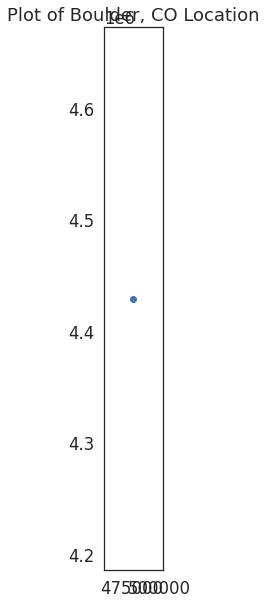

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
boulder_loc.plot(ax=ax)
ax.set_title("Plot of Boulder, CO Location")

# Turn off scientific notation
plt.ticklabel_format(useOffset=False)
plt.show()

In [ ]:
# View crs
boulder_loc.crs

<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada between 108°W and 102°W onshore and offshore - Northwest Territories, Nunavut, Saskatchewan.
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# Reproject the data to WGS84
boulder_df_geog = boulder_loc.to_crs(epsg=4326)
boulder_df_geog.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# View the coordinate values of the newly reprojected data.
boulder_df_geog

,geometry
0,POINT (-105.27056 40.01499)


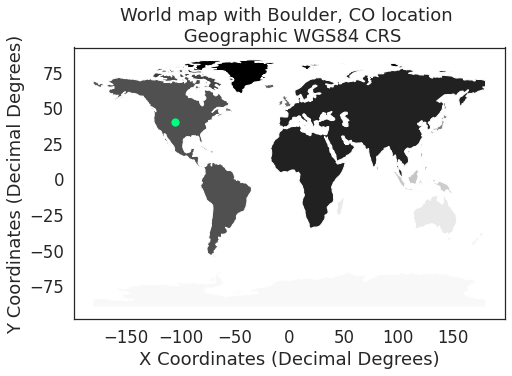

In [ ]:
# plot your data on top of your world map which is also in a geographic CRS.

fig, ax = plt.subplots(figsize=(10, 5))

worldBound.plot(cmap='Greys',
                ax=ax)

ax.set(title="World map with Boulder, CO location \n Geographic WGS84 CRS",
       xlabel="X Coordinates (Decimal Degrees)",
       ylabel="Y Coordinates (Decimal Degrees)")

boulder_df_geog.plot(ax=ax,
                     markersize=52,
                     color='springgreen')
plt.show()

# Understand EPSG, WKT and Other CRS Definition (proj.4)*italicized text*

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/epsg-proj4-coordinate-reference-system-formats-python/

In [ ]:
# Import the worldBoundary layer that you’ve been working with in this module to explore the CRS.

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import earthpy as et

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [ ]:
# Import world boundary shapefile
worldBound_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_land", "ne_110m_land.shp")
worldBound = gpd.read_file(worldBound_path)

worldBound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## How to Create a CRS Object in Python

To do this you completed the following steps:

1. You manually created an array for a single point (x,y).
2. You turned that x,y point into a shapely points object
3. Finally convert that point object to a pandas GeoDataFrame


In [ ]:
# Create a numpy array with x,y location of Boulder
boulder_xy = np.array([[476911.31, 4429455.35]])

# Create shapely point object
boulder_xy_pt = [Point(xy) for xy in boulder_xy]

# Convert to spatial dataframe - geodataframe -- assign the CRS using epsg code
boulder_loc = gpd.GeoDataFrame(boulder_xy_pt,
                               columns=['geometry'],
                               crs={'init': 'epsg:2957'})

# View crs of new spatial points object
boulder_loc.crs

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:2957>
Name: NAD83(CSRS) / UTM zone 13N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Canada between 108°W and 102°W onshore and offshore - Northwest Territories, Nunavut, Saskatchewan.
- bounds: (-108.0, 48.99, -102.0, 84.0)
Coordinate Operation:
- name: UTM zone 13N
- method: Transverse Mercator
Datum: NAD83 Canadian Spatial Reference System
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Reproject Vector data

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/reproject-vector-data-in-python/

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Setting plotting style for the notebook
sns.set_style("white")
sns.set(font_scale=1.5)

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

In [ ]:
#  Notice the CRS of each layer

# Import the data
sjer_roads_path = os.path.join("data", "spatial-vector-lidar", "california", 
                               "madera-county-roads", "tl_2013_06039_roads.shp")
sjer_roads = gpd.read_file(sjer_roads_path)

# aoi stands for area of interest
sjer_aoi_path = os.path.join("data", "spatial-vector-lidar", "california", 
                             "neon-sjer-site", "vector_data", "SJER_crop.shp")
sjer_aoi = gpd.read_file(sjer_aoi_path)

# View the Coordinate Reference System of both layers 
print(sjer_roads.crs)
print(sjer_aoi.crs)

epsg:4269
epsg:32611


In [ ]:
# Reproject the aoi to match the roads layer
sjer_aoi_wgs84  = sjer_aoi.to_crs(epsg=4269)

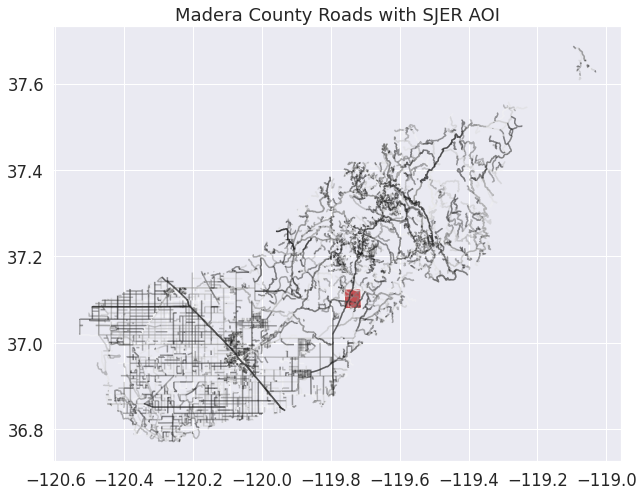

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

sjer_roads.plot(cmap='Greys', ax=ax, alpha=.5)
sjer_aoi_wgs84.plot(ax=ax, markersize=10, color='r')

ax.set_title("Madera County Roads with SJER AOI");

## Import US Boundary census data

In [ ]:
# Import data into geopandas dataframe
state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

# View data structure
type(state_boundary_us)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# View the first few lines of the data
state_boundary_us.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


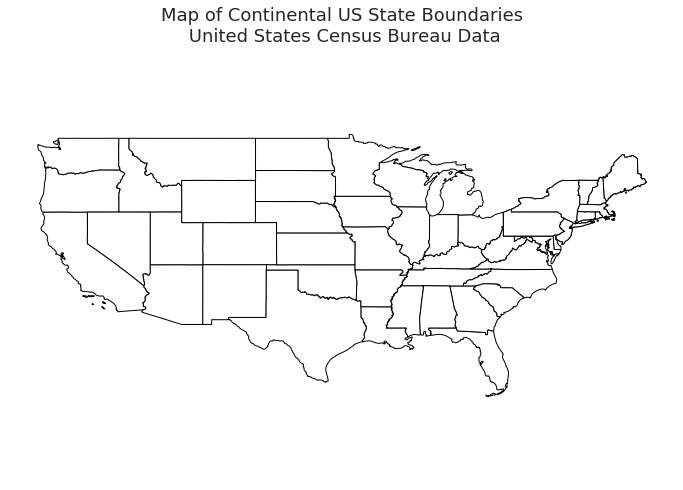

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize = (12,8))
state_boundary_us.plot(ax = ax, facecolor = 'white', edgecolor = 'black')

# Add title to map
ax.set(title="Map of Continental US State Boundaries\n United States Census Bureau Data")

# Turn off the axis  
plt.axis('equal')
ax.set_axis_off()

plt.show()

## US boundary layer

In [ ]:
# Import United States country boundary data
county_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                       "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(county_boundary_us_path)

type(country_boundary_us)

geopandas.geodataframe.GeoDataFrame

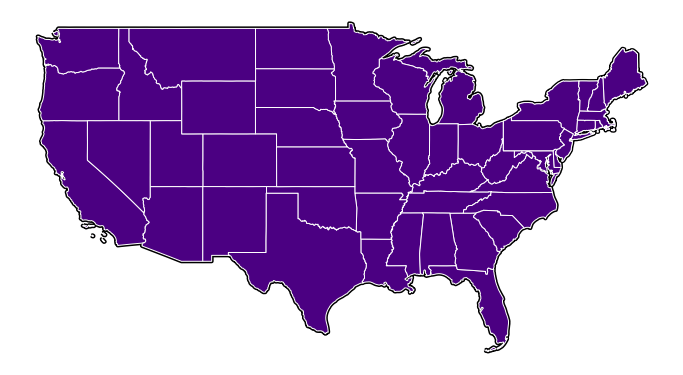

In [ ]:
# Plot data 
fig, ax = plt.subplots(figsize = (12,7))
country_boundary_us.plot(ax=ax, 
                         alpha=1, 
                         edgecolor="black",
                         color = "white",
                         linewidth=4)

state_boundary_us.plot(ax = ax, 
                      color = "indigo",
                      edgecolor = "white",
                      linewidth = 1)
ax.set_axis_off()
plt.show()

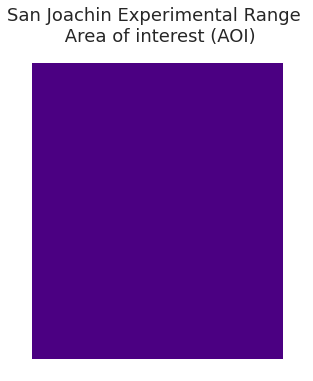

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize = (6,6))

sjer_aoi.plot(ax=ax, color = "indigo")
ax.set(title='San Joachin Experimental Range \n Area of interest (AOI)')

ax.set_axis_off()
plt.show()

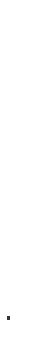

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

country_boundary_us.plot(ax=ax, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3, 
                         alpha=.8)

state_boundary_us.plot(ax = ax, 
                       color = "white", 
                       edgecolor ="gray")
sjer_aoi.plot(ax=ax, color = "indigo")

# Turn off axis  
ax.set_axis_off()
plt.show()

When you try to plot the state and country boundaries with the SJER_AOI what happens? Notice that this map does not look right even though the layers plotted just fine individually. This suggests there may be a CRS issue.

In [ ]:
# View CRS of each layer
print(sjer_aoi.crs)
print(country_boundary_us.crs)
print(state_boundary_us.crs)

epsg:32611
epsg:4326
epsg:4326


## CRS Units - View Object Extent

In [ ]:
# View spatial extent for both layers 
print(sjer_aoi.total_bounds)
print(state_boundary_us.total_bounds)

[ 254570.567      4107303.07684455  258867.40933092 4112361.92026107]
[-124.725839   24.498131  -66.949895   49.384358]


## Reproject Vector data

In [ ]:
# Reproject the aoi to the same CRS as the state_boundary_use object
sjer_aoi_WGS84 = sjer_aoi.to_crs(state_boundary_us.crs)

# View CRS of new reprojected layer
print(sjer_aoi_WGS84.total_bounds)
print('sjer_aoi crs: ', sjer_aoi_WGS84.crs)
print('state boundary crs:', state_boundary_us.crs)

[-119.76262834   37.07990136 -119.71268568   37.12656698]
sjer_aoi crs:  epsg:4326
state boundary crs: epsg:4326


In [ ]:
# Reproject using the full proj.4 string copied from spatial reference.org
sjer_aoi_WGS84_2 = sjer_aoi.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

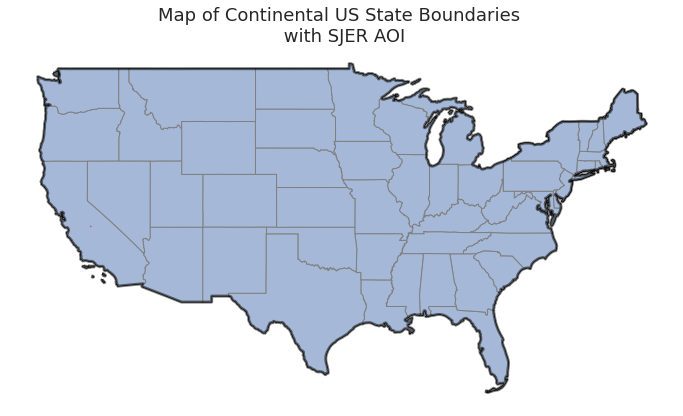

In [ ]:
# Once our data are reprojected, you can try to plot again.
fig, ax = plt.subplots(figsize = (12,8))
state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)
sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

ax.set_axis_off()
plt.show()

##  Zoom in on just the area 

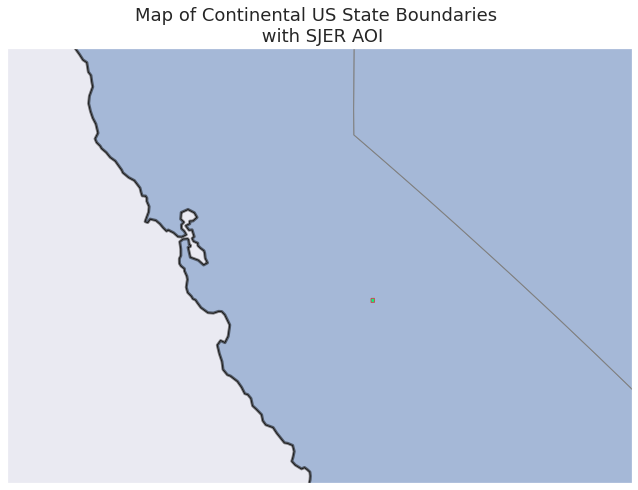

In [ ]:

# ax.set(xlim=[minx, maxx], ylim=[miny, maxy])
fig, ax = plt.subplots(figsize = (12,8))

state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.5, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

sjer_aoi_WGS84.plot(ax=ax, 
                    color='springgreen',
                   edgecolor = "r")

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")
ax.set(xlim=[-125, -116], ylim=[35, 40])

# Turn off axis  
ax.set(xticks = [], yticks = []);

##  convert the polygon to a polygon CENTROID

In [ ]:
# Grab the centroid x, y location of the aoi and turn it into a new spatial object. 
AOI_point = sjer_aoi_WGS84["geometry"].centroid
type(AOI_point)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


geopandas.geoseries.GeoSeries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


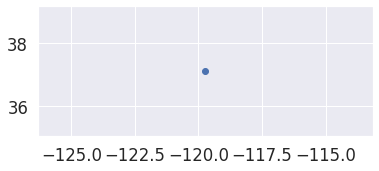

In [ ]:
sjer_aoi_WGS84["geometry"].centroid.plot();

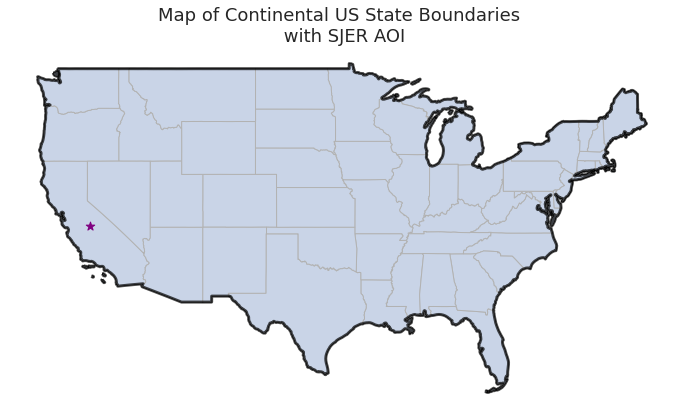

In [ ]:
fig, ax = plt.subplots(figsize = (12,7))

state_boundary_us.plot(ax = ax,
                      linewidth=1,
                      edgecolor="black")

country_boundary_us.plot(ax=ax,
                         alpha=.7, 
                         edgecolor="black",
                         color = "white",
                         linewidth=3)

AOI_point.plot(ax=ax,
              markersize=80,
              color='purple',
              marker='*')

ax.set(title="Map of Continental US State Boundaries \n with SJER AOI")

# Turn off axis  
ax.set_axis_off();

# Clip a spatial vector layer in Python using Shapely & GeoPandas:

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/vector-data-processing/clip-vector-data-in-python-geopandas-shapely/

In [ ]:
!pip install pandas fiona shapely pyproj rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd

# Load the box module from shapely to create box objects
from shapely.geometry import box
import earthpy as et
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)

# Adjust plot font sizes
sns.set(font_scale=1.5)
sns.set_style("white")

# Set working dir & get data
data = et.data.get_data('spatial-vector-lidar')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## How to clip shape file in python

In [ ]:
# Import all of your data at the top of your notebook to keep things organized.
country_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                        "usa", "usa-boundary-dissolved.shp")
country_boundary_us = gpd.read_file(country_boundary_us_path)

state_boundary_us_path = os.path.join("data", "spatial-vector-lidar", 
                                      "usa", "usa-states-census-2014.shp")
state_boundary_us = gpd.read_file(state_boundary_us_path)

pop_places_path = os.path.join("data", "spatial-vector-lidar", "global", 
                               "ne_110m_populated_places_simple", "ne_110m_populated_places_simple.shp")
pop_places = gpd.read_file(pop_places_path)

# Are the data all in the same crs?
print("country_boundary_us", country_boundary_us.crs)
print("state_boundary_us", state_boundary_us.crs)
print("pop_places", pop_places.crs)

country_boundary_us epsg:4326
state_boundary_us epsg:4326
pop_places epsg:4326


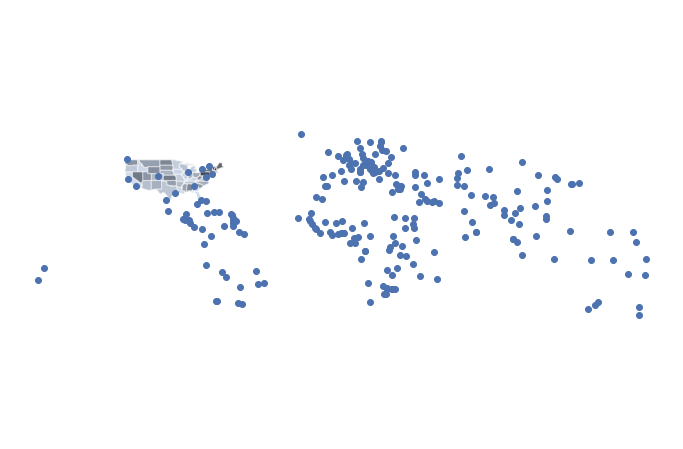

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

country_boundary_us.plot(alpha=.5,
                         ax=ax)

state_boundary_us.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)
pop_places.plot(ax=ax)

plt.axis('equal')
ax.set_axis_off()
plt.show()

## Clip The Points Shapefile in Python Using Geopandas

In [ ]:
# Clip the data using GeoPandas clip
points_clip = gpd.clip(pop_places, country_boundary_us)

# View the first 6 rows and a few select columns
points_clip[['name', 'geometry', 'scalerank', 'natscale', ]].head()

ImportError: ignored